<a href="https://colab.research.google.com/github/Nazmiyeah/Data-science-task-1/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#Load dataset
df = pd.read_csv("/content/train.csv")

#Basic data overview
print("Dataset Shape:", df.shape)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


Dataset Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

In [7]:
#Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

#Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#Drop 'Cabin' due to too many missing values
df.drop('Cabin', axis=1, inplace=True)

print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-7-3008825131.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-7-3008825131.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

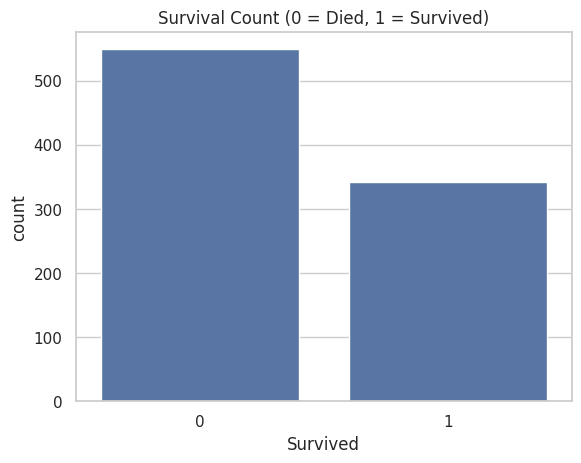

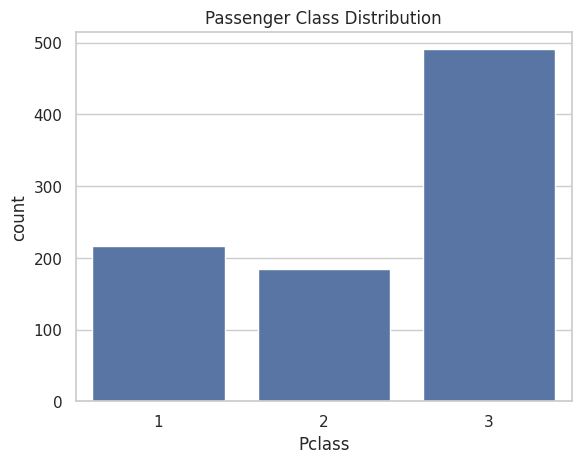

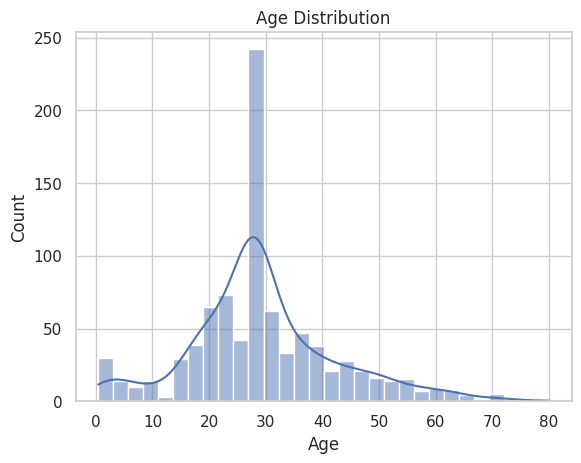

In [8]:
# Count of survival
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.show()

# Passenger class
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

# Age distribution
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()


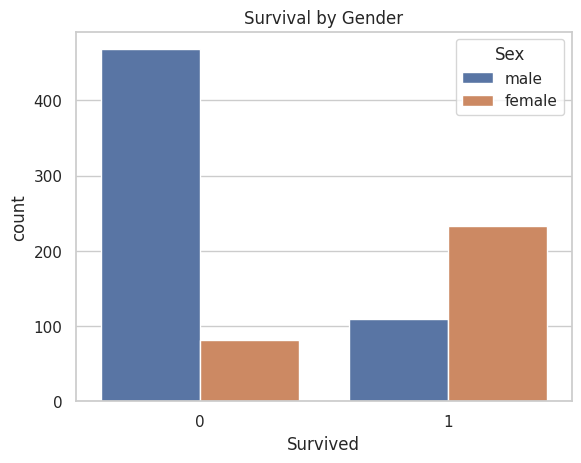

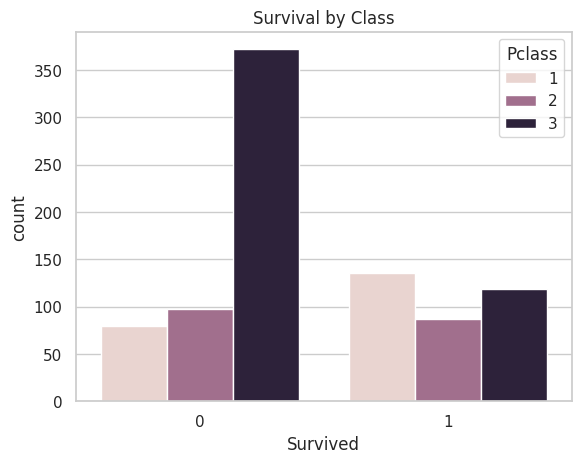

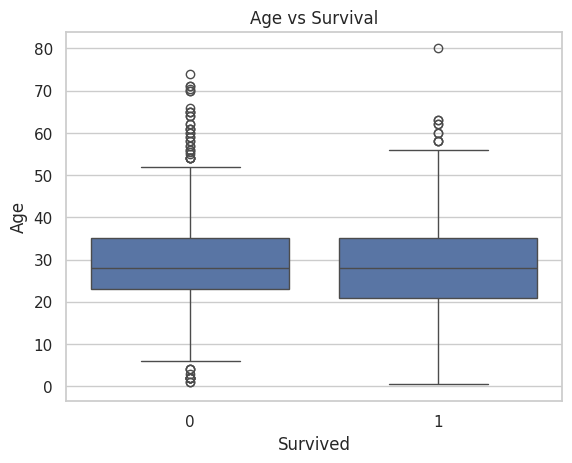

In [9]:
# Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()

# Survival by Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Class')
plt.show()

# Age vs Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()


In [11]:
# Grouped survival rate
print("Survival rate by class:")
print(df[['Pclass', 'Survived']].groupby('Pclass').mean())

print("\nSurvival rate by gender:")
print(df[['Sex', 'Survived']].groupby('Sex').mean())

print("\nSurvival rate by Embarked:")
print(df[['Embarked', 'Survived']].groupby('Embarked').mean())



Survival rate by class:
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

Survival rate by gender:
        Survived
Sex             
female  0.742038
male    0.188908

Survival rate by Embarked:
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009
